<a href="https://colab.research.google.com/github/parthugari-shivakoti/DataAnalysis/blob/main/Population_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import re

In [3]:
density = 'https://visaguide.world/asia/'
gdp = 'https://en.wikipedia.org/wiki/List_of_Asian_countries_by_GDP'
response = requests.get(density)
response2 = requests.get(gdp)
print(response2)
print(response)

<Response [200]>
<Response [200]>


In [4]:
den_txt = response.text
gdp_txt = response2.text

In [5]:
print(den_txt)
print("\n")
# print(gdp_txt)

<!DOCTYPE html>
<html lang="en-US">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1">
	<link rel="profile" href="https://gmpg.org/xfn/11"> 
	<meta name='robots' content='index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1' />
	<style>img:is([sizes="auto" i], [sizes^="auto," i]) { contain-intrinsic-size: 3000px 1500px }</style>
	
	<!-- This site is optimized with the Yoast SEO plugin v24.2 - https://yoast.com/wordpress/plugins/seo/ -->
	<title>List of Countries in Asia - VisaGuide.World</title><link rel="preload" data-rocket-preload as="image" href="https://visaguide.world/wp-content/uploads/2023/01/Visa-Guide-World.svg" fetchpriority="high"><link rel="preload" data-rocket-preload as="style" href="https://fonts.googleapis.com/css?family=Roboto%3A300%2C400%2C500&#038;display=swap" /><link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Roboto%3A300%2C400%2C500&#038;display=swap" media="print" onload=

In [6]:
soup = BeautifulSoup(den_txt)

In [7]:
tables = soup.findAll('table')
print(tables[1])

<table>
<thead>
<tr>
<th>Country</th>
<th>Capital</th>
<th>Area km2</th>
<th>Population (2021)</th>
</tr>
</thead>
<tbody>
<tr>
<td>Afghanistan</td>
<td>Kabul</td>
<td>652,864</td>
<td>39,835,428</td>
</tr>
<tr>
<td>Armenia</td>
<td>Yerevan</td>
<td>29,743</td>
<td>2,968,127</td>
</tr>
<tr>
<td>Azerbaijan</td>
<td>Baku</td>
<td>86,600</td>
<td>10,223,342</td>
</tr>
<tr>
<td>Bahrain</td>
<td>Manama</td>
<td>760</td>
<td>1,748,296</td>
</tr>
<tr>
<td>Bangladesh</td>
<td>Dhaka</td>
<td>147,570</td>
<td>166,303,498</td>
</tr>
<tr>
<td>Bhutan</td>
<td>Thimphu</td>
<td>38,394</td>
<td>779,898</td>
</tr>
<tr>
<td>Brunei</td>
<td>Bandar Seri Begawan</td>
<td>5,765</td>
<td>441,532</td>
</tr>
<tr>
<td>Cambodia</td>
<td>Phnom Penh</td>
<td>181,035</td>
<td>16,946,438</td>
</tr>
<tr>
<td>China (PRC)</td>
<td>Beijing</td>
<td>9,596,961</td>
<td>1,444,216,107</td>
</tr>
<tr>
<td>East Timor</td>
<td>Dili</td>
<td>14,874</td>
<td>1,343,873</td>
</tr>
<tr>
<td>Georgia</td>
<td>Tbilisi</td>
<td>69,700<

<ipython-input-7-722c085d42ed>:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  tables = soup.findAll('table')


In [8]:
len(tables)

3

In [9]:
columns = tables[1].findAll('th')
# tds = tables[1].findAll('td')
columns

<ipython-input-9-28b781d661cf>:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  columns = tables[1].findAll('th')


[<th>Country</th>,
 <th>Capital</th>,
 <th>Area km2</th>,
 <th>Population (2021)</th>]

In [10]:
# Assuming 'headers' contains the list of <th> elements
columns = [th.text for th in columns]
# values = [td.strip() for td in tds]
# print(header_values)
print(columns)



['Country', 'Capital', 'Area km2', 'Population (2021)']


In [11]:
table_values = tables[1].findAll('td')
table_values = [table_value.text for table_value in table_values]


<ipython-input-11-f11c23f1c5cd>:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  table_values = tables[1].findAll('td')


In [12]:
rows = tables[1].findAll('tr')
print(columns,"\n",rows[1])


['Country', 'Capital', 'Area km2', 'Population (2021)'] 
 <tr>
<td>Afghanistan</td>
<td>Kabul</td>
<td>652,864</td>
<td>39,835,428</td>
</tr>


<ipython-input-12-0323bab0c2dc>:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  rows = tables[1].findAll('tr')


In [13]:
# one way to extract rows..........
data = []
for row in rows[1:]:
    x=row.findAll('td')
    x = [i.text.strip() for i in x]
    data.append(x)
data[:5]

<ipython-input-13-316d9ca6e79a>:4: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  x=row.findAll('td')


[['Afghanistan', 'Kabul', '652,864', '39,835,428'],
 ['Armenia', 'Yerevan', '29,743', '2,968,127'],
 ['Azerbaijan', 'Baku', '86,600', '10,223,342'],
 ['Bahrain', 'Manama', '760', '1,748,296'],
 ['Bangladesh', 'Dhaka', '147,570', '166,303,498']]

In [14]:
df = pd.DataFrame(data, columns = columns)
df.head(4)

,Country,Capital,Area km2,Population (2021)
0,Afghanistan,Kabul,"652,864","39,835,428"
1,Armenia,Yerevan,"29,743","2,968,127"
2,Azerbaijan,Baku,"86,600","10,223,342"
3,Bahrain,Manama,760,"1,748,296"


In [15]:
# Another way to extract rows........
for row in tables[1].find_all("tr")[1:]:
    cols = [td.text.strip() for td in row.find_all("td")]
    print(cols)

['Afghanistan', 'Kabul', '652,864', '39,835,428']
['Armenia', 'Yerevan', '29,743', '2,968,127']
['Azerbaijan', 'Baku', '86,600', '10,223,342']
['Bahrain', 'Manama', '760', '1,748,296']
['Bangladesh', 'Dhaka', '147,570', '166,303,498']
['Bhutan', 'Thimphu', '38,394', '779,898']
['Brunei', 'Bandar Seri Begawan', '5,765', '441,532']
['Cambodia', 'Phnom Penh', '181,035', '16,946,438']
['China (PRC)', 'Beijing', '9,596,961', '1,444,216,107']
['East Timor', 'Dili', '14,874', '1,343,873']
['Georgia', 'Tbilisi', '69,700', '3,979,765']
['Hong Kong', 'City of Victoria', '2,755', '7,552,810']
['India', 'New Delhi', '3,287,263', '1,393,409,038']
['Indonesia', 'Jakarta', '1,904,569', '276,361,783']
['Iran', 'Tehran', '1,648,195', '85,028,759']
['Iraq', 'Baghdad', '438,317', '41,179,350']
['Israel', 'Jerusalem (disputed)', '20,770', '8,789,774']
['Japan', 'Tokyo', '377,915', '126,050,804']
['Jordan', 'Amman', '89,342', '10,269,021']
['Kazakhstan', 'Nur-Sultan', '2,724,900', '18,994,962']
['Kuwait', 

In [16]:
# headers = [th.text.strip() for th in tables[1].find_all("th")]
data = []
for row in tables[1].find_all("tr")[1:]:
    cols = [td.text.strip() for td in row.find_all("td")]
    data.append(cols)
# print(data[:3])
df = pd.DataFrame(data, columns=columns)
print(df.head(5))

       Country  Capital Area km2 Population (2021)
0  Afghanistan    Kabul  652,864        39,835,428
1      Armenia  Yerevan   29,743         2,968,127
2   Azerbaijan     Baku   86,600        10,223,342
3      Bahrain   Manama      760         1,748,296
4   Bangladesh    Dhaka  147,570       166,303,498


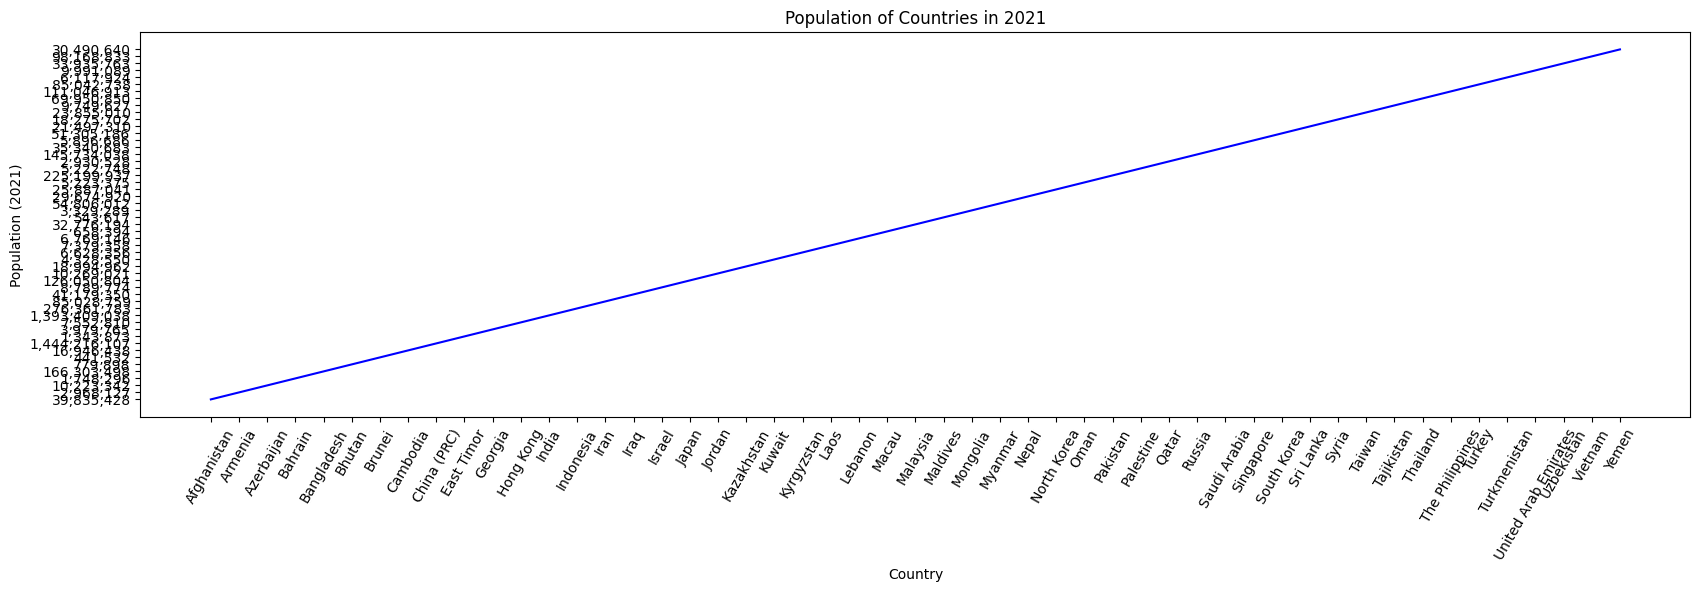

In [17]:
plt.figure(figsize=(20, 5))
plt.plot(df['Country'], df['Population (2021)'], color= 'blue')
plt.xticks(rotation=60)  # Rotates x-axis labels for better readability
plt.xlabel("Country")
plt.ylabel("Population (2021)")
plt.title("Population of Countries in 2021")
plt.show()


In [18]:
print(df[['Area km2', 'Population (2021)']].head(3))

  Area km2 Population (2021)
0  652,864        39,835,428
1   29,743         2,968,127
2   86,600        10,223,342


In [19]:
x = df['Area km2'].str.replace(',','').astype(float)
y = df['Population (2021)'].str.replace(',','').astype(float)
print(x.head(3)," ", y.head(3))

0    652864.0
1     29743.0
2     86600.0
Name: Area km2, dtype: float64   0    39835428.0
1     2968127.0
2    10223342.0
Name: Population (2021), dtype: float64


In [20]:
df['Area km2'] = x
df['Population (2021)'] = y

In [21]:
df.head(5)

,Country,Capital,Area km2,Population (2021)
0,Afghanistan,Kabul,652864.0,39835428.0
1,Armenia,Yerevan,29743.0,2968127.0
2,Azerbaijan,Baku,86600.0,10223342.0
3,Bahrain,Manama,760.0,1748296.0
4,Bangladesh,Dhaka,147570.0,166303498.0


In [22]:
print(df[['Country', 'Population (2021)']].head(3))

       Country  Population (2021)
0  Afghanistan         39835428.0
1      Armenia          2968127.0
2   Azerbaijan         10223342.0


In [23]:
# Calculate population density
df['Population_Density'] = df['Population (2021)'] / df['Area km2']

# Display the dataframe with the new column
print(df[['Country', 'Population_Density']].head(5))


       Country  Population_Density
0  Afghanistan           61.016426
1      Armenia           99.792455
2   Azerbaijan          118.052448
3      Bahrain         2300.389474
4   Bangladesh         1126.946520


In [24]:
df.head(7)

,Country,Capital,Area km2,Population (2021),Population_Density
0,Afghanistan,Kabul,652864.0,39835428.0,61.016426
1,Armenia,Yerevan,29743.0,2968127.0,99.792455
2,Azerbaijan,Baku,86600.0,10223342.0,118.052448
3,Bahrain,Manama,760.0,1748296.0,2300.389474
4,Bangladesh,Dhaka,147570.0,166303498.0,1126.946520
5,Bhutan,Thimphu,38394.0,779898.0,20.313018
6,Brunei,Bandar Seri Begawan,5765.0,441532.0,76.588378


In [25]:
import seaborn as sns

# Bar Chart (Population Density by Country)

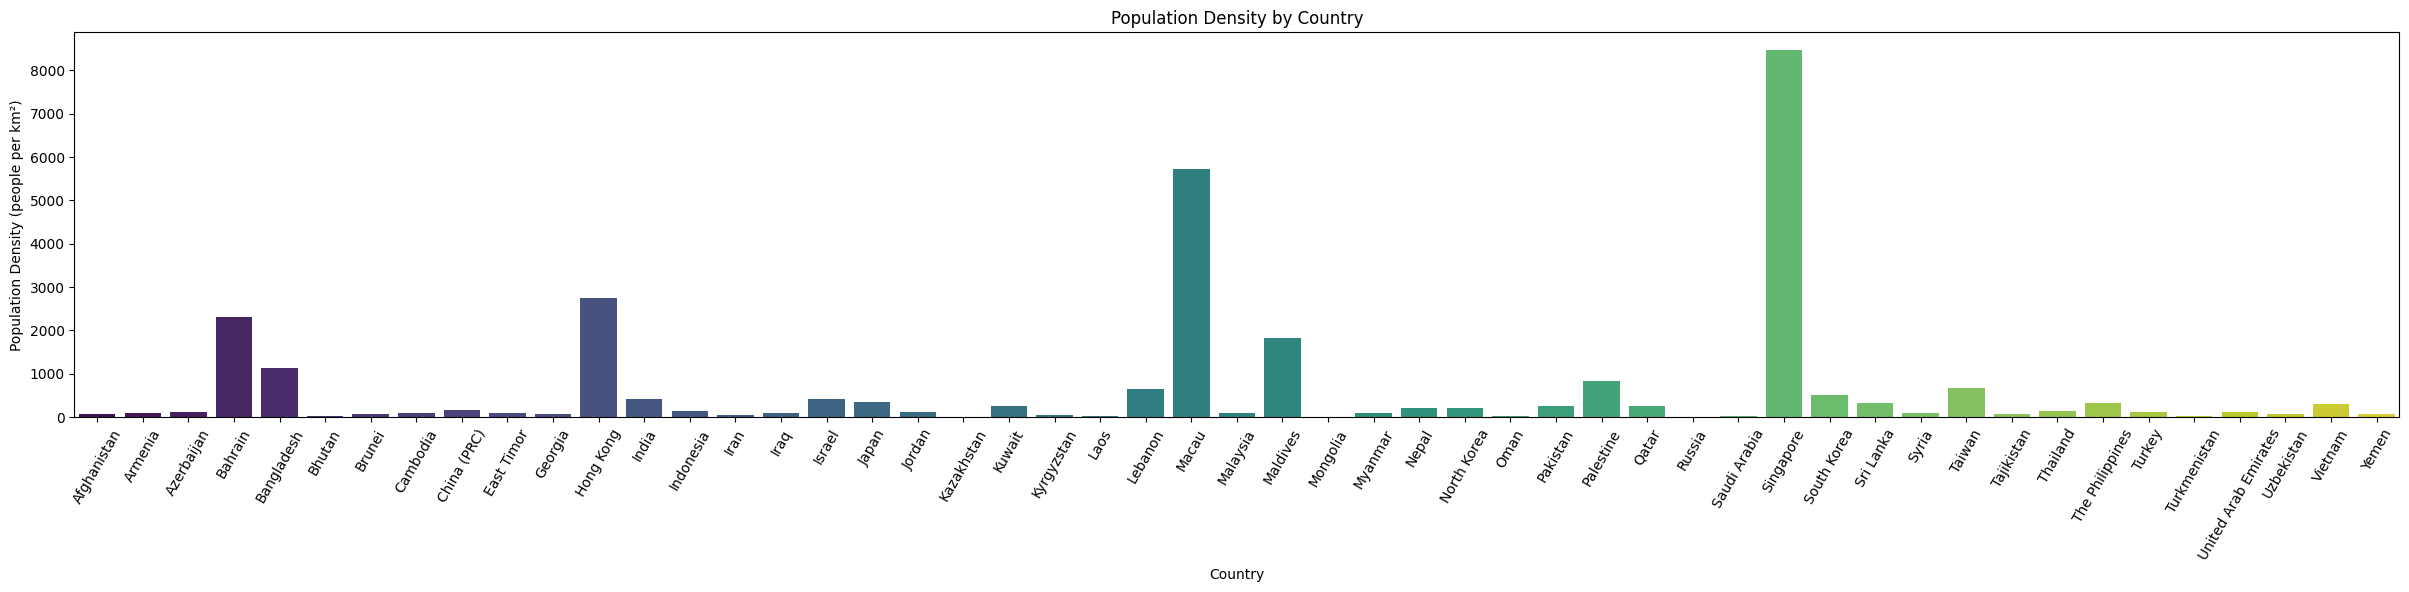

In [26]:
plt.figure(figsize=(30, 5))
sns.barplot(x="Country", y="Population_Density", hue="Country", data=df, palette="viridis", legend=False)
plt.xlabel("Country")
plt.ylabel("Population Density (people per km²)")
plt.title("Population Density by Country")
plt.xticks(rotation=60)
plt.show()


 # Line Graph (Population Density Trend)

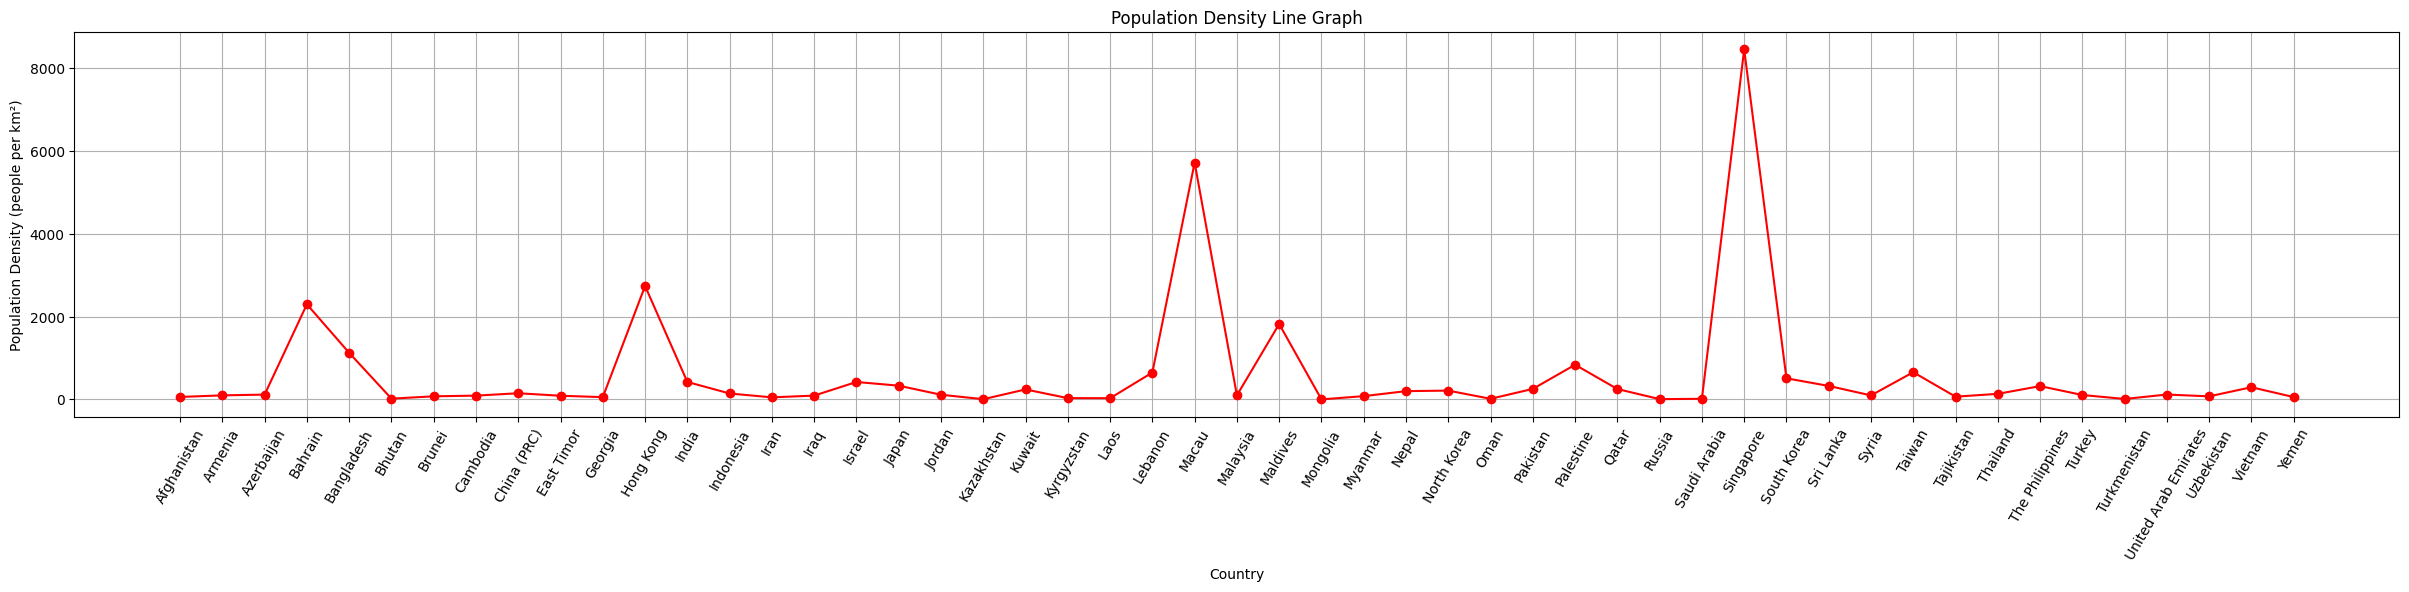

In [27]:
plt.figure(figsize=(30, 5))
plt.plot(df["Country"], df["Population_Density"], marker='o', linestyle='-', color='r')
plt.xlabel("Country")
plt.ylabel("Population Density (people per km²)")
plt.title("Population Density Line Graph")
plt.xticks(rotation=60)
plt.grid()
plt.show()


# Scatter Plot (Country vs. Population Density)

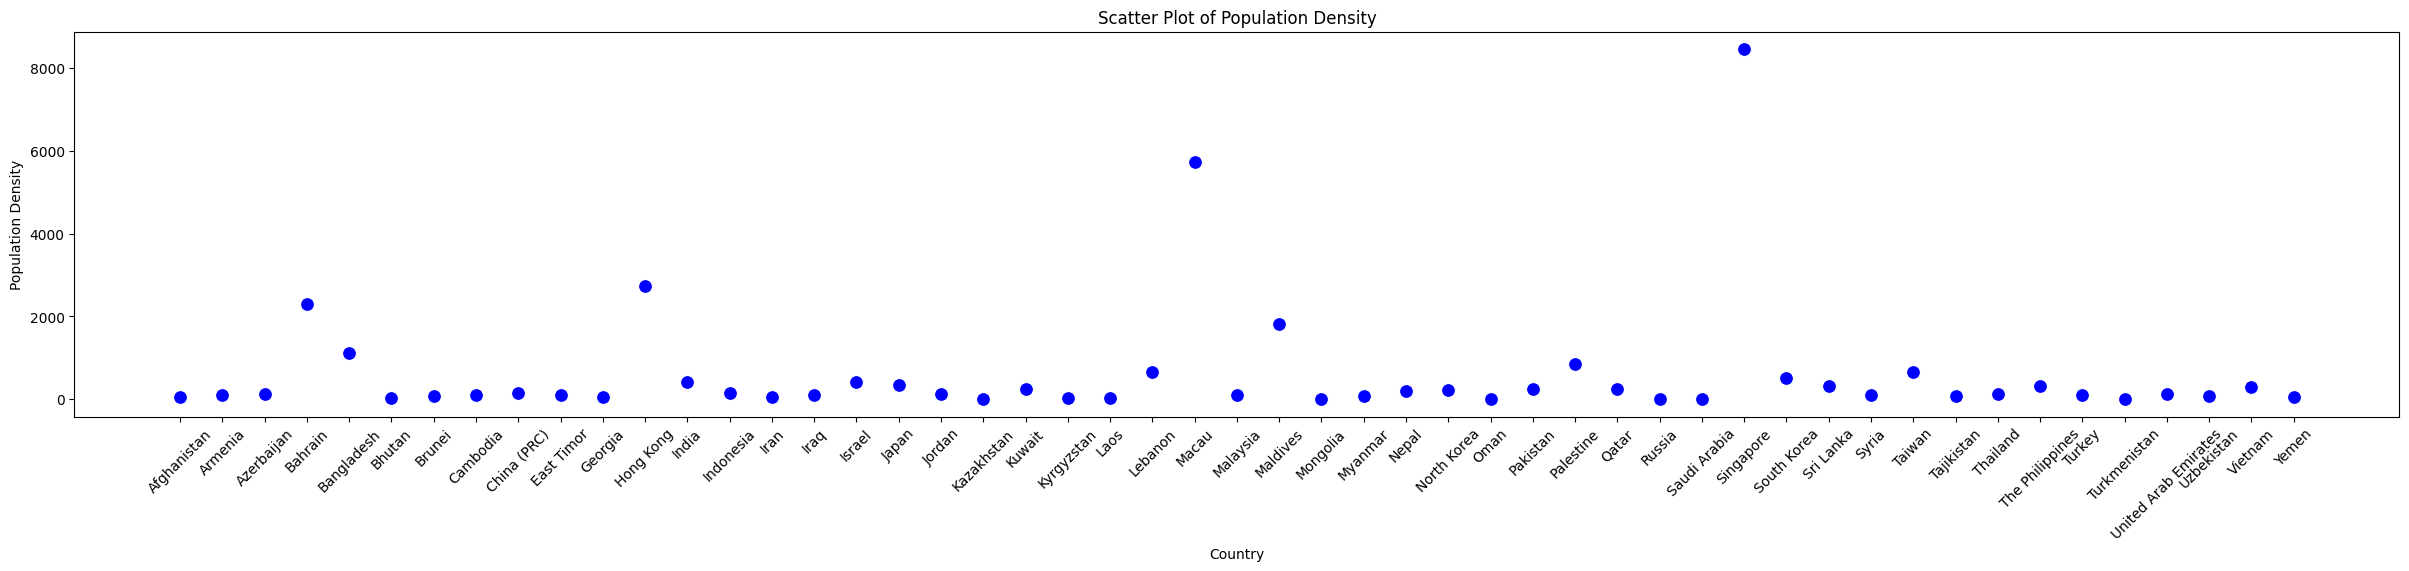

In [28]:
plt.figure(figsize=(30, 5))
sns.scatterplot(x=df["Country"], y=df["Population_Density"], color="blue", s=100)
plt.xlabel("Country")
plt.ylabel("Population Density")
plt.title("Scatter Plot of Population Density")
plt.xticks(rotation=45)
plt.show()

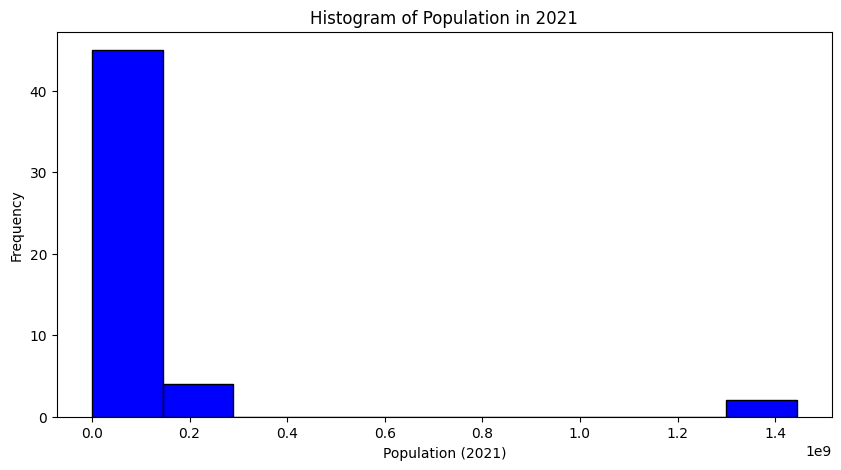

In [29]:
plt.figure(figsize=(10, 5))
plt.hist(df['Population (2021)'], bins=10, color='blue', edgecolor='black')  # Adjust bins as needed
plt.xlabel("Population (2021)")
plt.ylabel("Frequency")
plt.title("Histogram of Population in 2021")
plt.show()


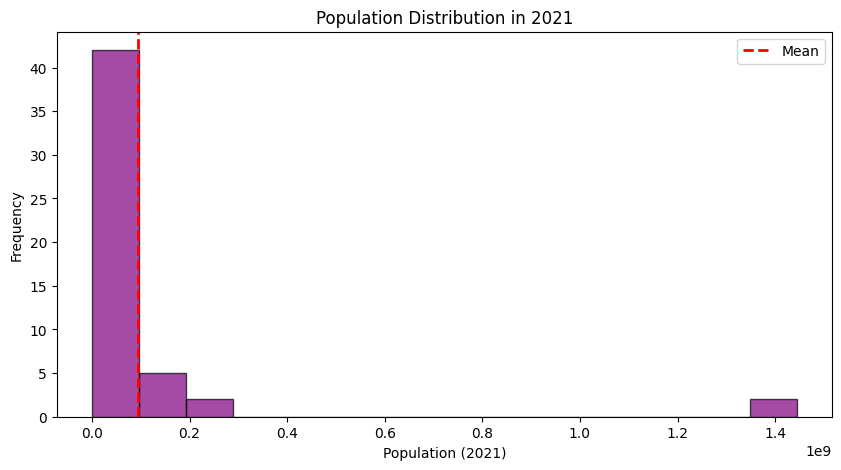

In [30]:
plt.figure(figsize=(10, 5))
plt.hist(df['Population (2021)'], bins=15, color='purple', alpha=0.7, edgecolor='black')  # More bins and transparency
plt.axvline(df['Population (2021)'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()
plt.xlabel("Population (2021)")
plt.ylabel("Frequency")
plt.title("Population Distribution in 2021")
plt.show()
